# Report - a simple example

This notebook illustrates the functionality of the Report class, which enables you to write a report about your data quality investigations and a datasets's profile, while you analyse it. You may output the report in:
- Plain text (e.g., for subsequent editting in a word processor)
- As a webpage (.htm or .html)
- In Latex (.tex)

## Includes: viz_data_quality and other libraries

In [13]:
import os
import pandas as pd

from vizdataquality import calculate as vdqc, datasets as vdqd, plot as vdqp, report as vdqr

## Get a dataframe's profile

In [14]:
dataset = 'simple'
dataset = 'missing 1'
num_rows, df = vdqd.get_dataset(dataset)
df_output = vdqc.calc(df)
num_cols = df.shape[1]

## Create a report while analysing the data

### Initialise the report and add a title

In [15]:
overwrite=True # True or False
report_folder = 'TMP' # The folder in which the output is stored (it must exist)
report = vdqr.Report()
report.add_title('Example report for the ' + dataset + ' dataset')

### Add section headings

By default headings are Level 1, but they may be specified using the 'level' parameter (see below).

The Report class also has built-in headings for a six-step data quality/profiling workflow, which is illustrated in the Workflow example notebook. Those steps are:
- report.step1() Look at your data (is anything obviously wrong?)
- report.step2() Watch out for special values
- report.step3() Is any data missing?
- report.step4() Check each variable
- report.step5() Check combinations of variables
- report.step6() Profile the cleaned data

In [16]:
report.add_heading('Introduction', text='This is a simple report, which shows how the results of data quality and profiling investigations may be output in plain text, as a webpage or as a Latex document.')
report.paragraph('Use the paragraph() function to add additional general paragraphs of text.')
report.add_heading('Results')

### Add tables

In [17]:
report.add_heading('A section with tables', level=2)

#### A table showing the number of rows and columns in the dataset

The 'text' parameter is optional. If you use the keyword '\\$table' then a reference to the table number will be inserted when the report is output. There is an equivalent keyword for figures ('\\$figure').

In [18]:
report.dataset_size(dataset, num_rows, num_cols, text='$table shows the number of rows and columns in the dataset.')

#### Descriptive statistics for each variable, output as a textual table

You may also output any dataframe using the report.table() function.

In [19]:
cols = ['Data type', 'Example value', 'Number of missing values']
caption = 'The data type, an example value and the number of missing values in of each variable.'
report.add_descriptive_stats(df_output[cols], text='$table shows descriptive statistics for each variable in the dataset.', caption=caption)

#### The same descriptive statistics output as an image of a table

Tables may be output as images. The 'loc' parameter positions the table in the centre of the image, and by manually adjusting the figure size you can get the table to fit nicely within the figure.

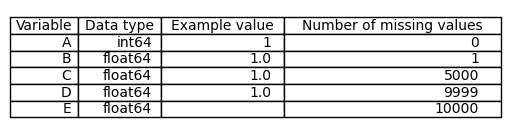

In [20]:
fig_kw = {'size_inches': (6, 1.5)}
image_filename = os.path.join(report_folder, 'table_desc_stats.jpg')
vdqp.table(df_output[cols], include_index=True, filename=image_filename, overwrite=overwrite, fig_kw=fig_kw, loc='center')
report.add_table(filename=image_filename, text='$table shows the same descriptive statistics, but as an image.', caption=caption)

### Add a figure showing different descriptive stats

Perceptual discontinuity is used for some bars so that you can easily see that variable B is missing a few values (rather than being complete) and D does have some values (rather than being totally empty). Similarly variables A, B, C and D each have only a few unique values, whereas E is totally empty.

For further information, see the Bar chart (missing values) example notebook.

In [21]:
report.add_heading('A section with figures', level=2)

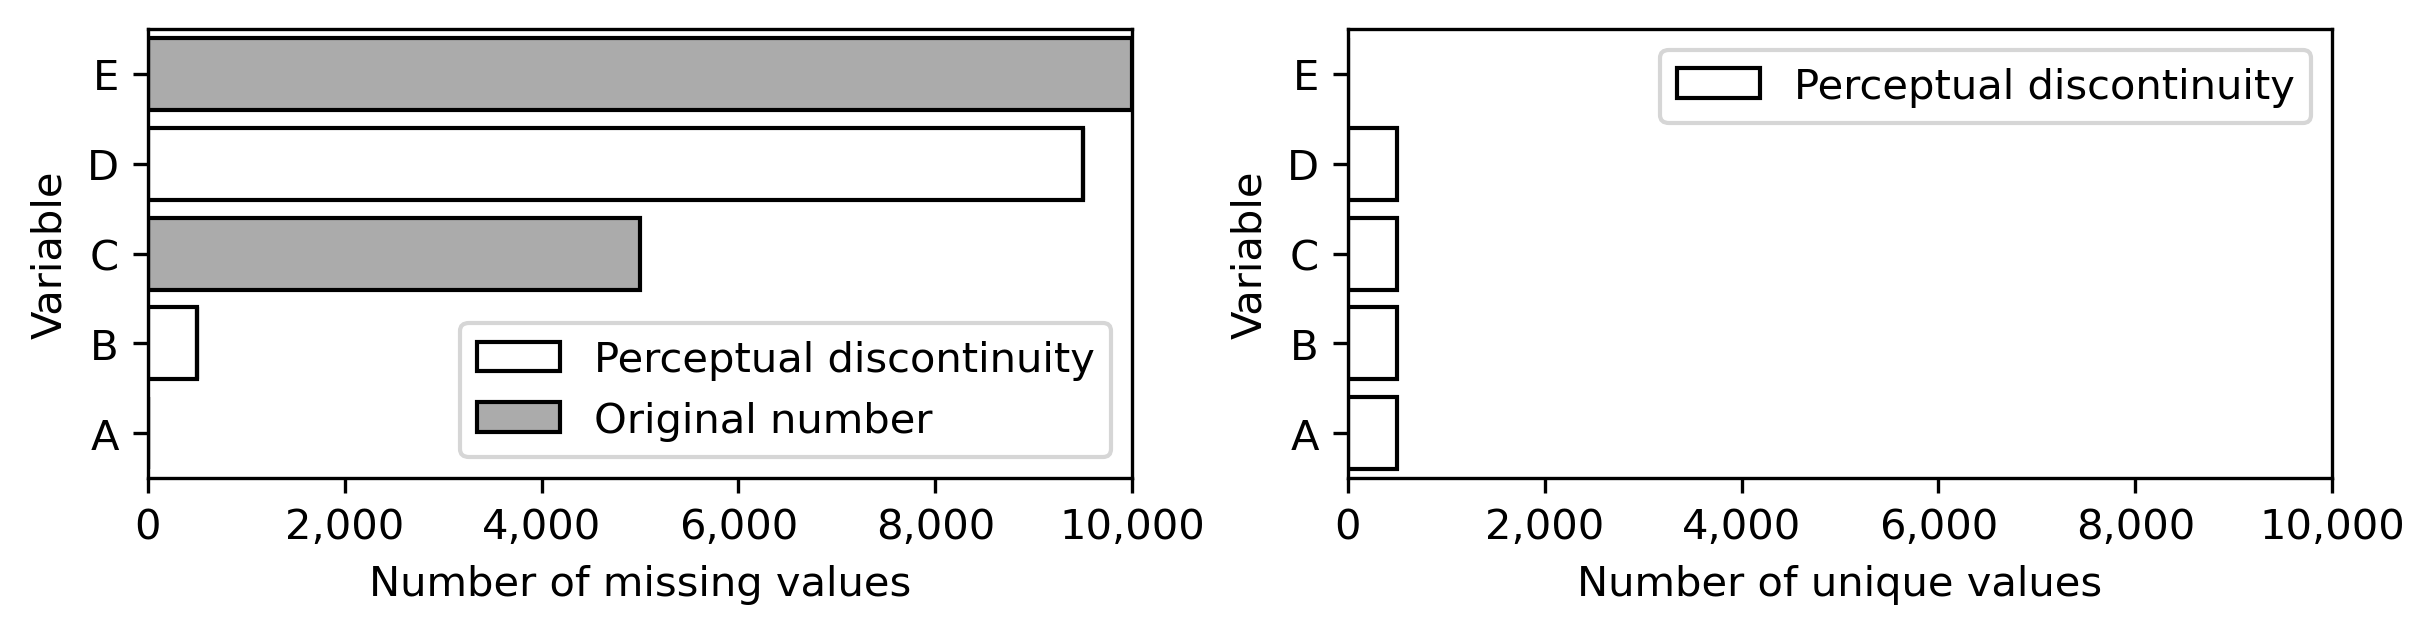

In [22]:
cols = ['Number of missing values', 'Number of unique values']
fig_kw = {'size_inches': (8, 2), 'constrained_layout': True, 'dpi': 300}
ax_kw = {'xlim': (0, num_rows)}
image_filename = os.path.join(report_folder, 'fig_desc_stats.jpg')
vdqp.plotgrid('scalars', df_output[cols], num_cols=2, vert=False, filename=image_filename, overwrite=overwrite, fig_kw=fig_kw, ax_kw=ax_kw)
report.add_figure(image_filename, text='$figure shows other descriptive statistics for each variable.', caption='The number of values and number of unique values in each variable.')

### Add acknowledgements

In [23]:
report.add_acknowledgements('Thank you to A.N. Other for their help.')

### Save the file (text, HTML or latex)

The table_kw parameter provides optional parameters for outputting HTML and Latex tables. For details see pd.DataFrame.to_html() and pd.DataFrame.to_latex(). For Latex output, 'position' is also applied to figures/tables that are stored as images.

NB: In Latex, if your variable names contain characters such as '_' then you may need to manually edit the output.

In [24]:
report.save(os.path.join(report_folder, 'example_report.txt'), overwrite=overwrite)

report.save(os.path.join(report_folder, 'example_report.html'), overwrite=overwrite) # The file extension may be .htm or .html

table_kw = {}
table_kw={'position': 'h!'} # Ask Latex to place each image 'exactly here'
report.save(os.path.join(report_folder, 'example_report.tex'), overwrite=overwrite, table_kw=table_kw)